# Stochastic job matching PoC

In short, you got projects that need a person with a set of skills. And you got a group of workers each with a set of skills. How should you assign them to the projects to get the most suitable people to the projects?

In this notebook I've just made a simple Proof of Concept for using monte carlo simulation with some sort of simulated annealing inspired sampling to achieve this.

Anyway, if a projects need 5 skills, and a worker has 4 of those, then that will be counted as a 4/5 = 0.8 match.

During the monte carlo part, we just save the best matching found so far for all projects/workers. The way it works is to initially assign workers to some project. Then for each iteration it swaps two workers at random. If it gets better, store this assignment to next iteration. If it gets worse, undo the change most of the time, with increasing probability as time goes on.

To keep things a little simpler now I have assumed that we have fewer workers than projects, and we only assign one worker per project.

In [1]:
import random
import pandas as pd
import numpy as np

MAX_TECH_NEEDS = 5
MAX_SKILLS     = 7
NUM_OF_PROJECTS = 200

def match(need, worker_skills):
    return sum([1 for n in need if n in worker_skills]) / len(need)

skills = ["C", "Python", "Java", "SQL", "Scratch", "Brainfuck", ".NET", "React", "Angular", "Javascript", "C++", "FORTRAN", "Delphi", "APL"]
customers = [str(i) for i in range(NUM_OF_PROJECTS)]
worker_names = ["Worker"+str(i) for i in range(int(NUM_OF_PROJECTS*0.9))]


project_needs = {name: random.sample(skills, random.randint(1, MAX_TECH_NEEDS)) for name in customers}
workers = {name: random.sample(skills, random.randint(1, MAX_SKILLS)) for name in worker_names}

In [2]:
print("The customer needs:")
for customer, needs in project_needs.items():
    print(f"Project {customer} needs {needs}")

print("\nAnd the people available:")
for name, w in workers.items():
    print(name, w)

The customer needs:
Project 0 needs ['Python', 'FORTRAN', '.NET']
Project 1 needs ['Angular', 'C++', 'C', 'Javascript']
Project 2 needs ['SQL', 'APL', 'C']
Project 3 needs ['Scratch', 'Delphi', 'React', 'Javascript']
Project 4 needs ['C', 'Javascript', 'Scratch', 'Angular']
Project 5 needs ['APL', 'SQL']
Project 6 needs ['Python', 'APL']
Project 7 needs ['Java', 'Angular', 'Javascript', 'SQL', 'Delphi']
Project 8 needs ['.NET', 'React', 'Angular', 'SQL', 'FORTRAN']
Project 9 needs ['Delphi', 'FORTRAN', '.NET', 'Java', 'APL']
Project 10 needs ['Delphi', 'Java', 'APL']
Project 11 needs ['Scratch']
Project 12 needs ['Delphi', 'Scratch', 'Python', 'Javascript']
Project 13 needs ['C', 'Delphi', 'Python', 'React']
Project 14 needs ['C++', 'Java', 'Scratch']
Project 15 needs ['Python', 'Brainfuck']
Project 16 needs ['Javascript', 'Scratch', 'React']
Project 17 needs ['SQL']
Project 18 needs ['React', '.NET', 'Delphi']
Project 19 needs ['Javascript', 'Delphi', 'FORTRAN', 'Python', 'Java']
Proj

In [3]:
org = pd.DataFrame(data = np.zeros((len(worker_names), len(customers))), index = worker_names, columns = customers)
for customer, needs in project_needs.items():
    matches = {name:match(needs, skills) for name, skills in workers.items()}
    for m, v in matches.items():
        org[customer][m] = v

org

0     1         2     3     4    5    6    7    8    9  ...  \
Worker0    0.000000  0.00  0.000000  0.00  0.00  0.0  0.0  0.0  0.0  0.0  ...   
Worker1    0.000000  0.25  0.000000  0.00  0.00  0.0  0.0  0.0  0.0  0.0  ...   
Worker2    0.333333  0.75  0.000000  0.50  0.75  0.0  0.0  0.6  0.4  0.4  ...   
Worker3    0.000000  0.00  0.333333  0.25  0.00  0.5  0.5  0.2  0.0  0.4  ...   
Worker4    0.333333  0.25  0.333333  0.25  0.25  0.5  0.5  0.2  0.6  0.4  ...   
...             ...   ...       ...   ...   ...  ...  ...  ...  ...  ...  ...   
Worker175  0.333333  0.25  0.666667  0.25  0.00  1.0  0.5  0.2  0.6  0.4  ...   
Worker176  0.333333  0.25  0.666667  0.00  0.00  1.0  1.0  0.4  0.2  0.4  ...   
Worker177  0.333333  0.00  0.333333  0.25  0.00  0.5  0.0  0.2  0.6  0.2  ...   
Worker178  0.666667  0.50  0.000000  0.00  0.25  0.0  0.5  0.2  0.4  0.2  ...   
Worker179  0.666667  0.25  0.000000  0.25  0.00  0.0  0.0  0.0  0.6  0.4  ...   

            190       191  192  193  194  195  196       197  198  199  
Worker0    0.25  0.000000  0.0  0.0  0.2  0.0  0.0  0.333333  0.2  0.0  
Worker1    0.00  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.2  0.0  
Worker2    0.75  0.333333  1.0  1.0  0.8  1.0  0.6  0.666667  0.4  0.6  
Worker3    0.00  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  
Worker4    0.00  0.333333  0.0  0.0  0.2  0.5  0.2  0.333333  0.2  0.4  
...         ...       ...  ...  ...  ...  ...  ...       ...  ...  ...  
Worker175  0.00  0.333333  0.0  0.0  0.0  0.0  0.2  0.000000  0.6  0.2  
Worker176  0.25  0.333333  0.0  0.0  0.4  0.0  0.2  0.000000  0.6  0.2  
Worker177  0.00  0.333333  0.0  0.0  0.0  0.5  0.4  0.000000  0.4  0.4  
Worker178  0.25  0.333333  0.0  0.0  0.4  0.0  0.0  0.333333  0.4  0.2  
Worker179  0.00  0.000000  0.0  0.0  0.0  0.5  0.2  0.000000  0.4  0.2  

[180 rows x 200 columns]

In [90]:
%%time
import copy
from scipy.special import expit

def get_value(df, customers, workers):
    """
    Lookup how good a match was, don't know why but it was already calculated and I got lazy.
    This also assumes that the _first_ "worker" is assigned to the _first_ project and so on.
    Should be remade once I get to enable having multiple workers on one project.
    """
    ret = 0
    for c,w in zip(customers,workers):
        try:
            ret += org[c][w] / (NUM_OF_PROJECTS * 0.9)
        except KeyError:
            continue
    return ret

def p_decrease(p):
    alpha = 0.0005
    return p*(1-alpha)

epochs = 200000
value  = np.zeros(epochs)
cw_diff = len(customers)-len(worker_names)
c = [c for c in customers] + ['']*(max(0, -cw_diff)) # pad with empty strings
w = [w for w in worker_names]  + ['']*(max(0, cw_diff))
max_v = 0
max_w = {}
p = 0.05
for epoch in range(epochs):
    v1 = get_value(org, c, w)
    idx1, idx2 = random.sample(range(len(w)),2)
    w[idx1], w[idx2] = w[idx2], w[idx1]
    v2 = get_value(org, c, w)
    if v2 >= v1 or random.random() <= p:
        value[epoch] = v2
        if v2 > max_v:
            max_v = v2
            max_w = copy.copy(w)
    else:
        w[idx1], w[idx2] = w[idx2], w[idx1]
        value[epoch] = v1
    p = p_decrease(p)

Wall time: 11min 50s


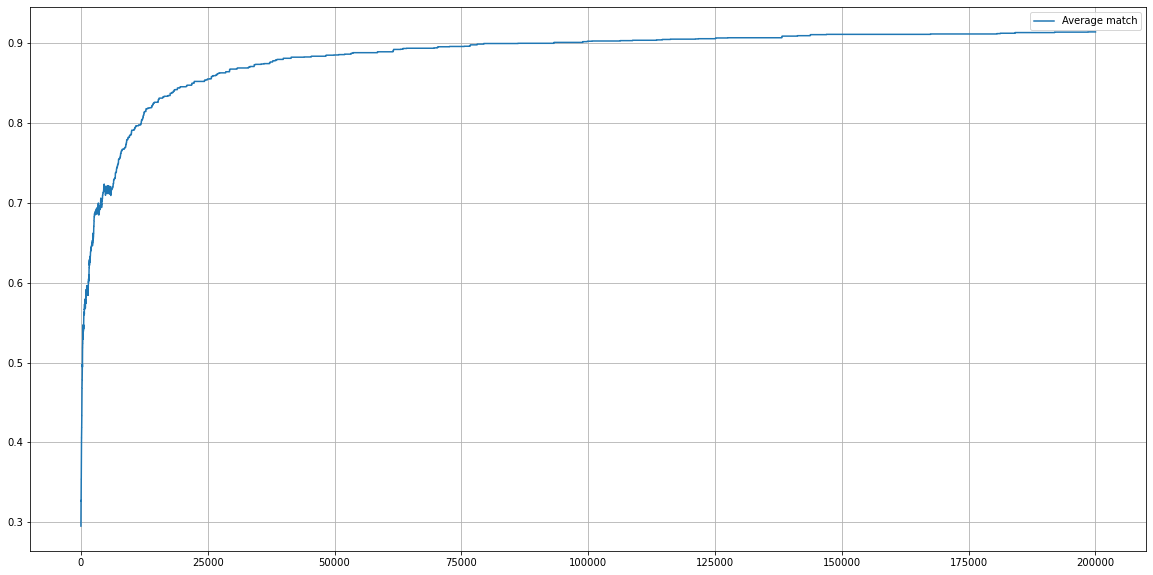

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(value)
plt.legend(["Average match"])
plt.grid()

In [92]:
print(f"Got max value of {max_v:.3} by assigning:")
for c, w in zip(customers,max_w):
    print(f"Project {c}: {w}")

Got max value of 0.914 by assigning:
Project 0: Worker152
Project 1: Worker71
Project 2: Worker158
Project 3: Worker31
Project 4: 
Project 5: Worker97
Project 6: Worker176
Project 7: Worker108
Project 8: Worker118
Project 9: 
Project 10: Worker3
Project 11: Worker57
Project 12: Worker59
Project 13: Worker131
Project 14: Worker161
Project 15: Worker13
Project 16: Worker98
Project 17: Worker96
Project 18: Worker9
Project 19: 
Project 20: Worker156
Project 21: Worker73
Project 22: Worker102
Project 23: Worker169
Project 24: Worker177
Project 25: Worker129
Project 26: Worker83
Project 27: Worker166
Project 28: Worker124
Project 29: Worker0
Project 30: Worker5
Project 31: Worker67
Project 32: Worker134
Project 33: Worker74
Project 34: Worker89
Project 35: Worker23
Project 36: Worker70
Project 37: Worker56
Project 38: Worker55
Project 39: Worker11
Project 40: Worker34
Project 41: Worker15
Project 42: Worker22
Project 43: Worker16
Project 44: Worker149
Project 45: Worker164
Project 46: Worker

0.5